# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here

import string
import demoji
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/JohnnyBlaze/ads-tm-api-scrape/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    if num_tokens > 0:
        lexical_diversity = num_unique_tokens / num_tokens
    else:
        lexical_diversity = 0.0
    num_characters = sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        common_tokens = Counter(tokens).most_common(5)
        print("Most common tokens:")
        for token, count in common_tokens:
            print(f"{token}: {count}")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
Most common tokens:
text: 3
here: 2
example: 2
is: 1
some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: These assertion statements help verify the accuracy of the 'descriptive_stats' function. They verify that the function is behaving as expected, contribute to test coverage by providing test cases to validate the behavior of the function, act to detect if any unintended changes have occured that alter the behavior of the function, and serve as examples of how to the use the function and what to expect for the given input. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
lyrics_data = {}

# Read in the lyrics data
lyrics_path = os.path.join(data_location, lyrics_folder)

# Iterate over artist folders
for artist_folder in os.listdir(lyrics_path):
    artist_folder_path = os.path.join(lyrics_path, artist_folder)
    
    # Check if the item is a directory
    if os.path.isdir(artist_folder_path):
        artist_lyrics = []
        
        # Iterate over files within the artist folder
        for file_name in os.listdir(artist_folder_path):
            file_path = os.path.join(artist_folder_path, file_name)
            
            # Check if the item is a file
            if os.path.isfile(file_path):
                with open(file_path, 'r') as file:
                    lyrics = file.read()
                    
                    # Store the lyrics in the list for the current artist
                    artist_lyrics.append(lyrics)
        
        # Store the list of lyrics for the current artist in the lyrics_data dictionary
        lyrics_data[artist_folder] = artist_lyrics

In [7]:
# Read in the twitter data
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]
twitter_data = defaultdict(list)

for f in desc_files:
    artist = f.split("_")[0]
    
    if artist == "robynkonichiwa" or artist == "cher":
        with open(data_location + twitter_folder + f, 'r', encoding='utf8') as infile:
            next(infile)
            for idx, line in enumerate(infile.readlines()):
                line = line.strip().split("\t")
                if len(line) == 7:
                    twitter_data[artist].append(line[6])

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
punctuation = set(punctuation) # speeds up comparison

In [9]:
# create your clean twitter data here

# Create a set of stopwords
stopwords_set = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_and_tokenize(twitter):
    # Remove punctuation characters
    twitter = ''.join([char for char in twitter if char not in punctuation])
    
    # Split on whitespace and convert to lowercase
    twitter = twitter.lower().split()
    
    # Remove stopwords
    twitter = [word for word in twitter if word not in stopwords_set]
    
    return twitter

# Clean and tokenize the Twitter data
cleaned_twitter_data = defaultdict(list)
for artist, tweets in twitter_data.items():
    for tweet in tweets:
        cleaned_tweet = clean_and_tokenize(tweet)
        cleaned_twitter_data[artist].append(cleaned_tweet)

In [10]:
# create your clean lyrics data here

# create my list of stop words
stopwords_set = set(stopwords.words('english'))

# Function to clean and tokenize lyrics
def clean_and_tokenize(lyrics):
    # Remove punctuation characters
    lyrics = ''.join([char for char in lyrics if char not in punctuation])
    
    # Split on whitespace and convert to lowercase
    lyrics = lyrics.lower().split()
    
    # Remove stopwords
    lyrics = [word for word in lyrics if word not in stopwords_set]
    
    return lyrics

# Clean and tokenize the lyrics data
cleaned_lyrics_data = defaultdict(list)
for artist, lyrics_list in lyrics_data.items():
    for lyrics in lyrics_list:
        cleaned_lyrics = clean_and_tokenize(lyrics)
        cleaned_lyrics_data[artist].append(cleaned_lyrics)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [11]:
# calls to descriptive_stats here

# Separate lyrics data for Robyn and Cher
robyn_lyrics = [token for sublist in cleaned_lyrics_data['robyn'] for token in sublist]
cher_lyrics = [token for sublist in cleaned_lyrics_data['cher'] for token in sublist]

# Separate Twitter data for Robyn and Cher
robyn_twitter = [token for sublist in cleaned_twitter_data['robynkonichiwa'] for token in sublist]
cher_twitter = [token for sublist in cleaned_twitter_data['cher'] for token in sublist]

# Call descriptive_stats on Robyn's lyrics data
print("Lyrics Data - Artist: Robyn")
stats = descriptive_stats(robyn_lyrics, num_tokens=5, verbose=True)
print("")

# Call descriptive_stats on Cher's lyrics data
print("Lyrics Data - Artist: Cher")
stats = descriptive_stats(cher_lyrics, num_tokens=5, verbose=True)
print("")

# Call descriptive_stats on Robyn's Twitter data
print("Twitter Data - Artist: Robyn")
stats = descriptive_stats(robyn_twitter, num_tokens=5, verbose=True)
print("")

# Call descriptive_stats on Cher's Twitter data
print("Twitter Data - Artist: Cher")
stats = descriptive_stats(cher_twitter, num_tokens=5, verbose=True)
print("")

Lyrics Data - Artist: Robyn
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
Most common tokens:
know: 308
dont: 301
im: 299
love: 275
got: 251

Lyrics Data - Artist: Cher
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
Most common tokens:
love: 1004
im: 513
know: 486
dont: 440
youre: 333

Twitter Data - Artist: Robyn
There are 1495526 tokens in the data.
There are 252736 unique tokens in the data.
There are 9127817 characters in the data.
The lexical diversity is 0.169 in the data.
Most common tokens:
music: 15147
love: 11677
im: 9051
och: 7922
life: 7383

Twitter Data - Artist: Cher
There are 15670504 tokens in the data.
There are 1517718 unique tokens in the data.
There are 92951718 characters in the data.
The lexical diversity is 0.097 in the data.
Most comm

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Definitely, I think the top 5 words would only consist of stop words if left in the data such as 'a', 'the', 'and', and more. The reasons for removing them 1) they provide no meaningful information. 2) Removing them speeds up the computation. In this instance I think we remove them since they do not provide meaningful information. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: To be honest I had no idea who Robyn is. I had to look her up and she is a pop singer and DJ. Cher has some famous songs, so I do know her and since both genres are pop I assume the leical diversity should be similar for both artists. To my surprise Robyn had more. They do have lots of crossover in tokens and most common ones overlap such as love, music, life, and im.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [12]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 

A: Please see below from the code results.


In [13]:
# Your code here

# Function to extract emojis from a string
def extract_emojis(text):
    return [c for c in text if emoji.is_emoji(c)]

# Dictionary to store the count of emojis for each artist
emoji_counts = {}

# Iterate over the artists
for artist, descriptions in twitter_data.items():
    emoji_counts[artist] = Counter()
    
    for description in descriptions:
        emojis = extract_emojis(description)
        emoji_counts[artist].update(emojis)

# Print the ten most common emojis for each artist
for artist, emojis in emoji_counts.items():
    print(f"Artist: {artist}")
    print("Ten most common emojis:")
    for emoji, count in emojis.most_common(10):
        print(f"{emoji}: {count}")
    print("")

Artist: cher
Ten most common emojis:
❤: 79223
🌈: 47549
♥: 33978
🏳: 33412
✨: 29468
💙: 21379
🏻: 20930
🌊: 20223
✌: 16773
💜: 16550

Artist: robynkonichiwa
Ten most common emojis:
❤: 4783
🌈: 4685
🏳: 3528
♥: 3103
✨: 2223
🏻: 1495
✌: 1189
🏼: 1139
♀: 836
💙: 809



### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 

A: Please see below from the code results


In [14]:
# Your code here

# Function to extract hashtags from a string
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

# Dictionary to store the count of hashtags for each artist
hashtag_counts = {}

# Iterate over the artists
for artist, descriptions in twitter_data.items():
    hashtag_counts[artist] = Counter() 
    
    for description in descriptions:
        hashtags = extract_hashtags(description)
        hashtag_counts[artist].update(hashtags)

# Print the ten most common hashtags for each artist
for artist, hashtags in hashtag_counts.items():
    print(f"Artist: {artist}")
    print("Ten most common hashtags:")
    for hashtag, count in hashtags.most_common(10):
        print(f"#{hashtag}: {count}")
    print("")

Artist: cher
Ten most common hashtags:
#BLM: 9535
#Resist: 6036
#BlackLivesMatter: 4681
#resist: 3797
#FBR: 3239
#TheResistance: 2995
#blacklivesmatter: 2645
#1: 2627
#Resistance: 1919
#RESIST: 1823

Artist: robynkonichiwa
Ten most common hashtags:
#BlackLivesMatter: 337
#BLM: 306
#blacklivesmatter: 208
#1: 199
#music: 174
#Music: 113
#EDM: 86
#LGBTQ: 75
#TeamFollowBack: 59
#blm: 56



### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [15]:
# Your code here

# Dictionary to store the count of words in song titles for each artist
title_word_counts = {}

# Iterate over the artists
for artist, lyrics_list in cleaned_lyrics_data.items():
    title_word_counts[artist] = Counter()
    
    for lyrics in lyrics_list:
        for line in lyrics:
            if line.strip():
                title = line.strip()
                words = title.split()
                title_word_counts[artist].update(words)

# Print the five most common words in song titles for each artist
for artist, word_counts in title_word_counts.items():
    print(f"Artist: {artist}")
    print("Five most common words in song titles:")
    for word, count in word_counts.most_common(5):
        print(f"{word}: {count}")
    print("")

Artist: robyn
Five most common words in song titles:
know: 308
dont: 301
im: 299
love: 275
got: 251

Artist: cher
Five most common words in song titles:
love: 1004
im: 513
know: 486
dont: 440
youre: 333



### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

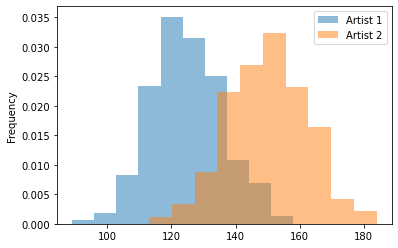

In [16]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: This regular expression matches on one or more whitespace characters. '\s' represents any whitespace character, which includes spaces, tabs, newlines, and more. '+' quantifier means the preceding pattern should match one or more times consecutively. 


In [19]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

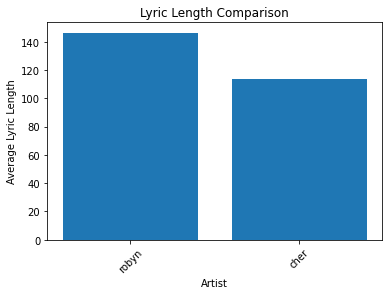

In [18]:
# Your lyric length comparison chart here. 

# Dictionary to store the average lyric lengths for each artist
average_lengths = {}

# Calculate the average lyric length for each artist
for artist, lyrics_list in cleaned_lyrics_data.items():
    total_length = 0
    num_lyrics = len(lyrics_list)
    for lyrics in lyrics_list:
        total_length += len(lyrics)
    average_length = total_length / num_lyrics
    average_lengths[artist] = average_length

# Convert the dictionary to lists for plotting
artists = list(average_lengths.keys())
lengths = list(average_lengths.values())

# Plot the bar chart
plt.bar(artists, lengths)
plt.xlabel('Artist')
plt.ylabel('Average Lyric Length')
plt.title('Lyric Length Comparison')
plt.xticks(rotation=45)
plt.show()